# Unsupervised Learning
## Project: Identify Customer Segments


<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#load">Loading the Data</a></li>
<li><a href="#prepare">Preprocessing</a></li>
<li><a href="#transform">Feature Transformation</a></li>
<li><a href="#cluster">Clustering</a></li>

</ul>

<a id='intro'></a>
## Introduction

In this project I will be applying unsupervised learning techniques to identify customer segments for a mail-order sales company in Germany. The datasets used were provided by Arvato and the information gained by this project could be used in direct matketing campaigned to targest the segments with the highest expected rate of return. 

There are three main sections of the project: Preprocessing, Feature Transformation, and Custering and after larger tasks there will be a summary of the task. 

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import time

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

<a id='load'></a>
### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

I will start off by loading the demographics data for the general population and then repeat the process for the feature attributes summary. This project will require prepreocess and some cleaning, so after the data is loaded I will do small exploration on the data to familiarize myself with the data.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

In [3]:
# The next several cells will be to familiarize myself with first the azdias dataframe then the feat_info.
# At the end of this section I will print the number of rows and columns in each dataset.

azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [4]:
azdias.tail()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
891216,-1,3,2,5.0,1,4,2,5,4,4,...,3.0,2.0,0.0,0.0,1.0,2.0,3.0,NaN,NaN,NaN
891217,-1,2,1,4.0,3,3,3,2,2,3,...,1.0,3.0,3.0,2.0,4.0,5.0,3.0,4.0,6.0,5.0
891218,-1,2,2,4.0,2,4,2,5,4,3,...,4.0,2.0,0.0,0.0,1.0,3.0,4.0,2.0,2.0,3.0
891219,-1,1,1,3.0,1,5,3,5,5,5,...,1.0,4.0,3.0,1.0,5.0,1.0,1.0,4.0,7.0,5.0
891220,-1,4,1,1.0,4,2,5,2,1,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,4.0,5.0


In [5]:
azdias.shape

(891221, 85)

In [6]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

Only 32 of the 85 columns don'e have missing data. KK_KUNDENTYP has the most missing values.

In [7]:
azdias.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGER_TYP,891221.0,-0.358435,1.198724,-1.0,-1.0,-1.0,-1.0,3.0
ALTERSKATEGORIE_GROB,891221.0,2.777398,1.068775,1.0,2.0,3.0,4.0,9.0
ANREDE_KZ,891221.0,1.522098,0.499512,1.0,1.0,2.0,2.0,2.0
CJT_GESAMTTYP,886367.0,3.632838,1.595021,1.0,2.0,4.0,5.0,6.0
FINANZ_MINIMALIST,891221.0,3.074528,1.321055,1.0,2.0,3.0,4.0,5.0
FINANZ_SPARER,891221.0,2.821039,1.464749,1.0,1.0,3.0,4.0,5.0
FINANZ_VORSORGER,891221.0,3.401106,1.322134,1.0,3.0,3.0,5.0,5.0
FINANZ_ANLEGER,891221.0,3.033328,1.529603,1.0,2.0,3.0,5.0,5.0
FINANZ_UNAUFFAELLIGER,891221.0,2.874167,1.486731,1.0,2.0,3.0,4.0,5.0
FINANZ_HAUSBAUER,891221.0,3.075121,1.353248,1.0,2.0,3.0,4.0,5.0


In [8]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [9]:
feat_info.tail()

,attribute,information_level,type,missing_or_unknown
80,PLZ8_HHZ,macrocell_plz8,ordinal,[-1]
81,PLZ8_GBZ,macrocell_plz8,ordinal,[-1]
82,ARBEIT,community,ordinal,"[-1,9]"
83,ORTSGR_KLS9,community,ordinal,"[-1,0]"
84,RELAT_AB,community,ordinal,"[-1,9]"


In [10]:
feat_info.shape

(85, 4)

In [11]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


In [12]:
feat_info.information_level.unique()

array(['person', 'household', 'building', 'microcell_rr4', 'microcell_rr3',
       'postcode', 'region_rr1', 'macrocell_plz8', 'community'], dtype=object)

In [13]:
feat_info.type.unique()

array(['categorical', 'ordinal', 'numeric', 'mixed', 'interval'], dtype=object)

In [14]:
feat_info.missing_or_unknown.unique()

array(['[-1,0]', '[-1,0,9]', '[0]', '[-1]', '[]', '[-1,9]', '[-1,X]',
       '[XX]', '[-1,XX]'], dtype=object)

In [15]:
azdias_row, azdias_col = azdias.shape
feat_info_row, feat_info_col = feat_info.shape

print('The azdias dataframe has {} rows and {} columns'.format(azdias_row, azdias_col))
print('The feat_info dataframe has {} rows and {} columns'.format(feat_info_row, feat_info_col))

The azdias dataframe has 891221 rows and 85 columns
The feat_info dataframe has 85 rows and 4 columns


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 
<a id='prepare'></a>
## Step 1: Preprocessing
<ul>
<li><a href="#1.1">Assess Missing Data</a></li>
<li><a href="#1.2">Select and Re-Encode Features</a></li>
<li><a href="#1.3">Create a Cleaning Function</a></li>
</ul>

<a id='1.1'></a>
### Step 1.1: Assess Missing Data

We will use the feature summary file to help make cleanind decisions. We will start by looking at the missing data, first by rows then by columns. 


#### Step 1.1.1: Convert Missing Value Codes to NaNs

The missing_or_unknown data is very helpful for converting the missing data. We will need to parse the missing_or_unknown column and then convert any datapoint that matches the parsed data into the numpy value "NaN". We will also look at the starting "na" (pandas default missing value) and then look at the total converted values.


In [16]:
# Total number of NA values.

print('azdias has {} missing values throughout the dataframe'.format(azdias.isna().sum().sum()))

azdias has 4896838 missing values throughout the dataframe


In [17]:
# Parse missing_or unknown values

missing_values = feat_info['missing_or_unknown'].apply(lambda x: x[1:-1].split(','))

In [18]:
# Creating a copy of database before I make changes. 
azdias_na = azdias[:]

In [19]:
# Identify missing values in dataframe and convert them to NaNs. 

for att, missing_val in zip(feat_info['attribute'], missing_values):
    if missing_val[0] != "": 
        for v in missing_val:
            if v.isnumeric() or v.lstrip('-').isnumeric():
                v=int(v)
            azdias_na.loc[azdias[att] == v, att] = np.nan

In [20]:
# Check NaN values

azdias_na.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [21]:
print('{} values were transformed into NaN'.format(azdias_na.isna().sum().sum()))

8373929 values were transformed into NaN


#### Step 1.1.2: Assess Missing Data in Each Column

Below we will explore any possible outliers in missing data for each column. 

In [22]:
#Start assessment by calculating percentage and sorting columns
missing_col = azdias_na.isna().sum()
missing_col = missing_col[missing_col > 0]/len(azdias_na)*100
missing_col.sort_values(inplace=True)
missing_col

ALTERSKATEGORIE_GROB      0.323264
CJT_GESAMTTYP             0.544646
GFK_URLAUBERTYP           0.544646
ONLINE_AFFINITAET         0.544646
RETOURTYP_BK_S            0.544646
LP_STATUS_FEIN            0.544646
LP_STATUS_GROB            0.544646
HH_EINKOMMEN_SCORE        2.058749
ANZ_PERSONEN              8.247000
SOHO_KZ                   8.247000
ANZ_TITEL                 8.247000
WOHNDAUER_2008            8.247000
KONSUMNAEHE               8.299737
LP_FAMILIE_GROB           8.728699
LP_FAMILIE_FEIN           8.728699
GEBAEUDETYP              10.451729
WOHNLAGE                 10.451729
OST_WEST_KZ              10.451729
MIN_GEBAEUDEJAHR         10.451729
GEBAEUDETYP_RASTER       10.452514
EWDICHTE                 10.518154
BALLRAUM                 10.518154
INNENSTADT               10.518154
LP_LEBENSPHASE_GROB      10.611509
ANZ_HH_TITEL             10.884842
ORTSGR_KLS9              10.914689
ARBEIT                   10.926022
RELAT_AB                 10.926022
LP_LEBENSPHASE_FEIN 

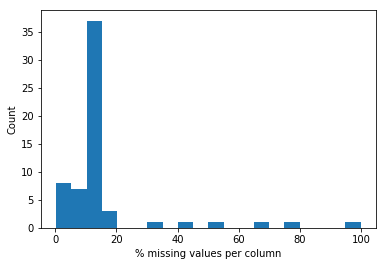

In [23]:
#Create Histogram using percentage of missing values

plt.hist(missing_col, bins=20)
plt.xlabel("% missing values per column")
plt.ylabel('Count')
plt.show()

This histogram is a good first look at which columns have missing values. As we can see most of the columns are missing under 20% of the data and there are several outliers that are missing over a quarter.

Next we will explore any outliers with a horizontal bar chart.

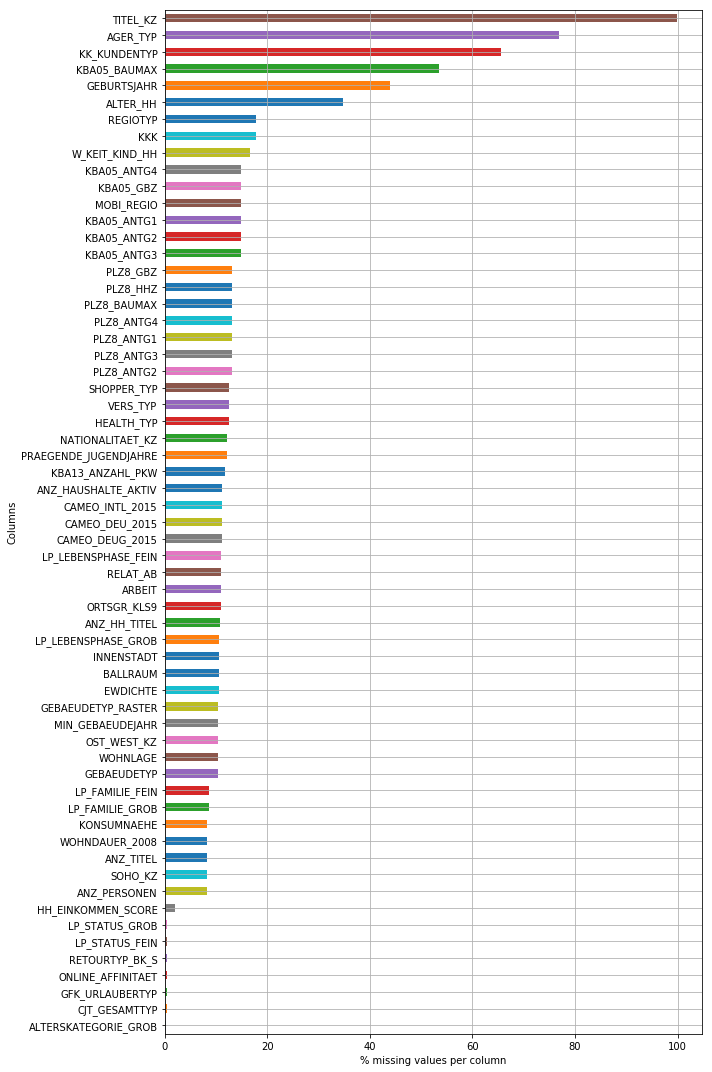

In [24]:
missing_col.plot.barh(figsize=(10,15))
plt.xlabel("% missing values per column")
plt.ylabel("Columns")
plt.tight_layout()
plt.grid(True)
plt.show()

The barchart confirms we have 6 outlier columns with over 30% of their data missing. I am now comfortable removing these columns. 

In [25]:
missing_col.sort_values(ascending=False)

TITEL_KZ                 99.757636
AGER_TYP                 76.955435
KK_KUNDENTYP             65.596749
KBA05_BAUMAX             53.468668
GEBURTSJAHR              44.020282
ALTER_HH                 34.813699
REGIOTYP                 17.735668
KKK                      17.735668
W_KEIT_KIND_HH           16.605084
KBA05_ANTG1              14.959701
KBA05_ANTG3              14.959701
KBA05_ANTG2              14.959701
KBA05_ANTG4              14.959701
MOBI_REGIO               14.959701
KBA05_GBZ                14.959701
PLZ8_ANTG1               13.073637
PLZ8_ANTG2               13.073637
PLZ8_ANTG3               13.073637
PLZ8_GBZ                 13.073637
PLZ8_ANTG4               13.073637
PLZ8_BAUMAX              13.073637
PLZ8_HHZ                 13.073637
SHOPPER_TYP              12.476816
VERS_TYP                 12.476816
HEALTH_TYP               12.476816
NATIONALITAET_KZ         12.153551
PRAEGENDE_JUGENDJAHRE    12.136608
KBA13_ANZAHL_PKW         11.871354
ANZ_HAUSHALTE_AKTIV 

In [26]:
outlier_col = ['TITEL_KZ', 'AGER_TYP', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR', 'ALTER_HH']
azdias_na= azdias_na.drop(labels=outlier_col, axis=1)

In [27]:
azdias_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 79 columns):
ALTERSKATEGORIE_GROB     888340 non-null float64
ANREDE_KZ                891221 non-null float64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null float64
FINANZ_SPARER            891221 non-null float64
FINANZ_VORSORGER         891221 non-null float64
FINANZ_ANLEGER           891221 non-null float64
FINANZ_UNAUFFAELLIGER    891221 non-null float64
FINANZ_HAUSBAUER         891221 non-null float64
FINANZTYP                891221 non-null float64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               780025 non-null float64
LP_LEBENSPHASE_FEIN      793589 non-null float64
LP_LEBENSPHASE_GROB      796649 non-null float64
LP_FAMILIE_FEIN          813429 non-null float64
LP_FAMILIE_GROB          813429 non-null float64
LP_STATUS_FEIN           886367 non-null float64
LP_STATUS

#### Discussion 1.1.2: Assess Missing Data in Each Column

We started this step by exploring the poportion of missing values per columns. The histogram told us that most of the columns included 20% of the data and there were several potential outliers columns. We then created a bar chart with showed us that there were 6 columns (listed below) that definitely seemed like outliers and were missing over 30% of their data. 

'TITEL_KZ' - missing 99.75% <br/>
'AGER_TYP' - missing 76.95<br/>
'KK_KUNDENTYP' - missing 65.59 <br/>
'KBA05_BAUMAX' - missing 53.46<br/>
'GEBURTSJAHR' - missing 44.02<br/>
'ALTER_HH' - missing 34.81<br/>

Once the column outliers were confirmed we removed them from the dataset. 

#### Step 1.1.3: Assess Missing Data in Each Row

Now that we have removed outliers in the columns we need to do the dame for the rows. It should be know that the removal of row data requires more analysis and careful consideration because every row represents an individual and the therefore the removal of this data could introduce bias, or misrepresent the larger population.

In [28]:
# We will start by trying to undestanding the missing row data
missing_rows = azdias_na.isna().sum(axis=1)
missing_rows = missing_rows[missing_rows > 0]/(len(azdias_na.columns))*100
missing_rows.sort_values(ascending=False, inplace=True)
missing_rows

732775    62.025316
643174    62.025316
472919    60.759494
604334    59.493671
604314    59.493671
768879    59.493671
604319    59.493671
604322    59.493671
604323    59.493671
275622    59.493671
62901     59.493671
275620    59.493671
604332    59.493671
275617    59.493671
604305    59.493671
275611    59.493671
275610    59.493671
62912     59.493671
604335    59.493671
604338    59.493671
604346    59.493671
604350    59.493671
146293    59.493671
604356    59.493671
62887     59.493671
768892    59.493671
146291    59.493671
348454    59.493671
604091    59.493671
604092    59.493671
            ...    
38561      1.265823
768647     1.265823
607245     1.265823
709042     1.265823
507663     1.265823
607271     1.265823
561427     1.265823
235434     1.265823
235435     1.265823
235445     1.265823
607405     1.265823
62924      1.265823
144785     1.265823
91916      1.265823
820005     1.265823
607433     1.265823
709002     1.265823
38612      1.265823
144760     1.265823


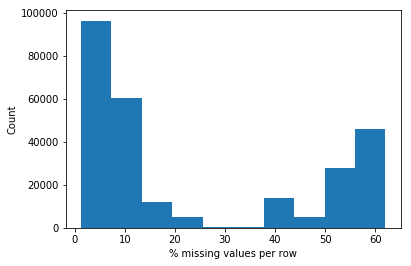

In [29]:
plt.hist(missing_rows)
plt.xlabel("% missing values per row")
plt.ylabel('Count')
plt.show()

Here we can see that there is a pretty large about of missing values between ~38 and ~60. For further analysis I will split this into two dataset, missing values <=30 and anything > 30

In [30]:
df_l_30 = azdias_na[azdias_na.isna().sum(axis=1) <= 30]
df_g_30 = azdias_na[azdias_na.isna().sum(axis=1) > 30]
df_g_30.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2.0,1.0,6.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,3.0,1.0,6.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2.0,1.0,6.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,3.0,2.0,6.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# This contains all columns with less than 30% missing values. 
complete_columns = df_l_30[df_l_30.columns[~df_l_30.isnull().all()]].columns
complete_columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB',
       'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S',
       'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT',
       'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT',
       'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'ANZ_PERSONEN',
       'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_DEUG_2015',
       'CAMEO

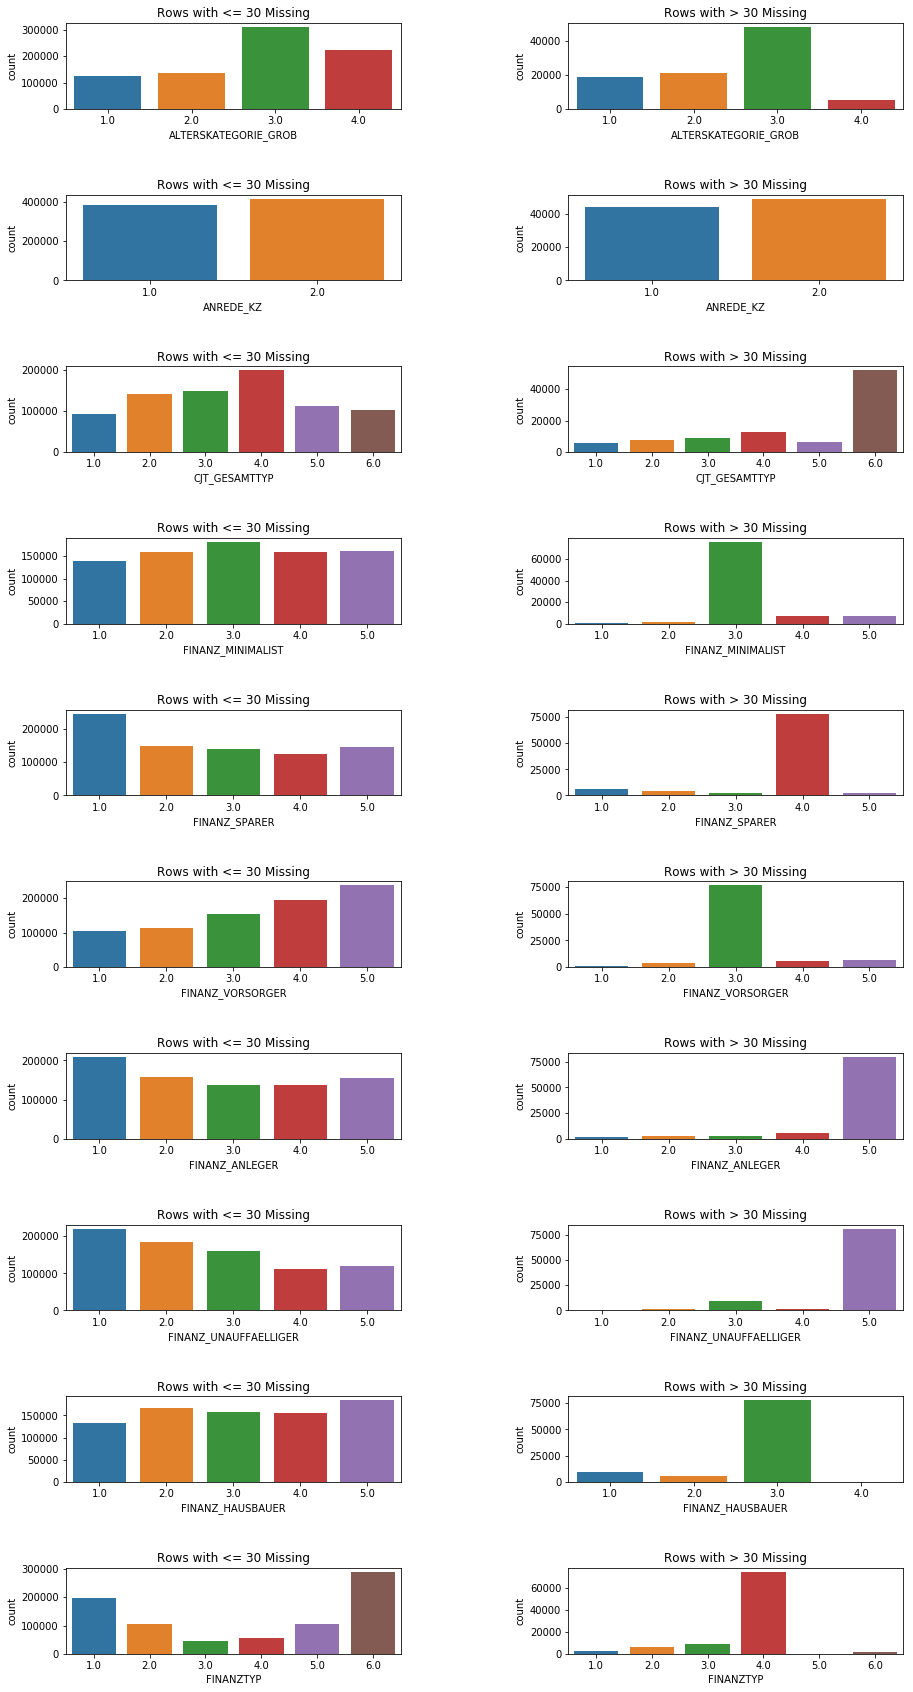

In [32]:
# Next I want to compare columns that have a lot of missing values and columns with less missing values. 

def plot_col(col, num):
    '''
    INPUT:
     - col: List of columns that could be ploted
     - num: This is the number of columns we will plot
      
    OUTPUT:
     - Comparison plot for the input num columns 
    '''
    fig, axs= plt.subplots(num,2,figsize=(15, 30))
    fig.subplots_adjust(hspace=1, wspace=.5)
    axs = axs.ravel()
    
    for i in range(num):
        sns.countplot(df_l_30[col[i]], ax=axs[i*2])
        axs[i*2].set_title('Rows with <= 30 Missing')
        
        sns.countplot(df_g_30[col[i]], ax=axs[i*2+1])
        axs[i*2+1].set_title('Rows with > 30 Missing')

plot_col(complete_columns, 10)

We can see that the distribution of the two datasets are very different. Before I process with cleaning the data I want to see what porportion of the overall data is missing more than 30%

In [33]:
print('There are {} rows that are missing more than 30% of data. This accounts for {}% of all data'
      .format(df_g_30.shape[0], np.round(df_g_30.shape[0] / azdias.shape[0] *100)))


There are 93154 rows that are missing more than 30% of data. This accounts for 10.0% of all data


10% is a big enough portion of the data to affect any machine learning, however, filling the data with incorrect values will also skew the results. Between a rock and a hard place I will drop the 10% of rows and move forward with azdias_clean.

In [34]:
azdias_clean = df_l_30[:]
azdias_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798067 entries, 1 to 891220
Data columns (total 79 columns):
ALTERSKATEGORIE_GROB     795264 non-null float64
ANREDE_KZ                798067 non-null float64
CJT_GESAMTTYP            793318 non-null float64
FINANZ_MINIMALIST        798067 non-null float64
FINANZ_SPARER            798067 non-null float64
FINANZ_VORSORGER         798067 non-null float64
FINANZ_ANLEGER           798067 non-null float64
FINANZ_UNAUFFAELLIGER    798067 non-null float64
FINANZ_HAUSBAUER         798067 non-null float64
FINANZTYP                798067 non-null float64
GFK_URLAUBERTYP          793318 non-null float64
GREEN_AVANTGARDE         798067 non-null int64
HEALTH_TYP               761341 non-null float64
LP_LEBENSPHASE_FEIN      747828 non-null float64
LP_LEBENSPHASE_GROB      750721 non-null float64
LP_FAMILIE_FEIN          766593 non-null float64
LP_FAMILIE_GROB          766593 non-null float64
LP_STATUS_FEIN           793318 non-null float64
LP_STATUS

#### Discussion 1.1.3: Assess Missing Data in Each Row

Cleaning the row data was much more challending then the columns. I ended up removing 10% of the rows because it was missing more than 30% of it's data. Now I am moving foward with my azdias_clean dataframe. 

<a id='1.2'></a>
### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [35]:
feat_info.attribute.unique()

array(['AGER_TYP', 'ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GEBURTSJAHR', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN',
       'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE',
       'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL',
       'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT',
       'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM',
       'SEMIO_PFLICHT', 'SEMIO_TRADV', 'SHOPPER_TYP', 'SOHO_KZ',
       'TITEL_KZ', 'VERS_TYP', 'ZABEOTYP', 'ALTER_HH', 'ANZ_PERSONEN',
       'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'KK_KUNDENTYP', 'W_KEIT_KIND_HH',
       'WOHNDAUER_2008', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL',
       'GEBAEUDETYP', 'KONSUMNAEHE', 'MIN_

In [36]:
# Remove outlier columns and set index as attribute for future queries.

feat_info = feat_info.set_index('attribute').drop(outlier_col)


In [37]:
feat_info.head()

,information_level,type,missing_or_unknown
attribute,,,
ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
ANREDE_KZ,person,categorical,"[-1,0]"
CJT_GESAMTTYP,person,categorical,[0]
FINANZ_MINIMALIST,person,ordinal,[-1]
FINANZ_SPARER,person,ordinal,[-1]


In [38]:
feat_info.type.unique()

array(['ordinal', 'categorical', 'mixed', 'numeric'], dtype=object)

In [39]:
# Create dictionary to hold datatypes
  
dt_dict={}
for c in azdias_clean.columns:
    dtype = feat_info.loc[c].type
    if dtype not in dt_dict:
        dt_dict[dtype] = 1
    else:
        dt_dict[dtype] += 1
    
dt_dict

{'ordinal': 49, 'categorical': 18, 'mixed': 6, 'numeric': 6}

#### Step 1.2.1: Re-Encode Categorical Features

Next we will explore each of the below types and convert them accordingly:


1) Categorical:
 - Determine if it is binary(numeric or non numeric), or multi-level.
     - Binary numeric values won't need any convering
     - Binary non numeric will need to be converted to 0,1
     - Multi-Level, one-hot encode

2)Numeric:
 - Keep the same

3) Mixed:
 - Will need to investigate each instance.


In [40]:
# Assess Categorical type
bin_cat = []
multi_cat = []
mixed_type = []
numeric_type = []
ordinal_type = []

for c in azdias_clean.columns:
    if feat_info.loc[c].type=='categorical':
        if len(azdias_clean[c].unique()) == 2:
            bin_cat.append(c)
        else:
            multi_cat.append(c)
            
    elif feat_info.loc[c].type=='mixed':
        mixed_type.append(c)
        
    elif feat_info.loc[c].type=='numeric':
        numeric_type.append(c)
        
    elif feat_info.loc[c].type=='ordinal':
        ordinal_type.append(c)

print('{} Binary Categorical Types'.format(len(bin_cat)))
print('{} Multi-Level Categorical Types'.format(len(multi_cat)))
print('{} Mixed Types'.format(len(mixed_type)))
print('{} Numeric Types'.format(len(numeric_type)))
print('{} Ordinal Types'.format(len(ordinal_type)))


4 Binary Categorical Types
14 Multi-Level Categorical Types
6 Mixed Types
6 Numeric Types
49 Ordinal Types


In [41]:
def column_type_info (df, t_list):
    '''
    Function turns a list into a np array, and prints the number of unique values with the data type of the column. 
    INPUT: 
     - Data Frame, 
     - Type List to convert and query
    OUTPUT: 
     - Column name
     - Number of unique values in the column
     - Data Type of the column
    '''
    for c in t_list:
        print(c, df[c].nunique(), df[c].dtype)
        

In [42]:
column_type_info (azdias_clean, bin_cat)

ANREDE_KZ 2 float64
GREEN_AVANTGARDE 2 int64
SOHO_KZ 2 float64
OST_WEST_KZ 2 object


In [43]:
column_type_info (azdias_clean, multi_cat)

CJT_GESAMTTYP 6 float64
FINANZTYP 6 float64
GFK_URLAUBERTYP 12 float64
LP_FAMILIE_FEIN 11 float64
LP_FAMILIE_GROB 5 float64
LP_STATUS_FEIN 10 float64
LP_STATUS_GROB 5 float64
NATIONALITAET_KZ 3 float64
SHOPPER_TYP 4 float64
VERS_TYP 2 float64
ZABEOTYP 6 float64
GEBAEUDETYP 7 float64
CAMEO_DEUG_2015 9 object
CAMEO_DEU_2015 44 object


**4 binary numeric columns** These can remain the same. <br/>

**1 binary non numeric** Add to columns for keeing for one-hot encoding.  <br/>
OST_WEST_KZ

**14 columns that are multi_level.** <br/>
According to the Data_Dictionary.md there are several columns that are meant to have multi_levels. There are several columns that are repetative or not applicable to the client (ex. type of building) and will be removed. The remaining columns will be transformed using one-hot encode. 

**Columns to keep:** <br/>
CJT_GESAMTTYP: Customer-Journey-Typology: preferred information and buying channels for consumer <br/>
FINANZTYP: Most descriptive financial type for individual <br/>
GFK_URLAUBERTYP: Vacation habits<br/> 
LP_FAMILIE_GROB: Life stage, rough scale <br/>
LP_STATUS_GROB: Family type, rough scale <br/>
SHOPPER_TYP: Shopper typology <br/>
ZABEOTYP: Energy consumption typology <br/>
CAMEO_DEUG_2015: German CAMEO: Wealth / Life Stage Typology, rough scale <br/>


**Repetative Columns to Remove:** <br/>
LP_FAMILIE_FEIN: Life stage, fine scale <br/>
LP_STATUS_FEIN: Family type, fine scale <br/>
CAMEO_DEU_2015: German CAMEO: Wealth / Life Stage Typology, detailed scale <br/>


**Unnecessary Columns:** <br/>
NATIONALITAET_KZ: Nationality based on given name analysis<br/>
VERS_TYP: Insurance typology <br/>
GEBAEUDETYP: Type of building (residential vs. commercial) <br/>


In [44]:
to_transform = ['OST_WEST_KZ', 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_GROB', 'LP_STATUS_GROB', 'SHOPPER_TYP', 'ZABEOTYP', 'CAMEO_DEUG_2015']

to_remove = ['LP_FAMILIE_FEIN', 'LP_STATUS_FEIN', 'CAMEO_DEU_2015', 'NATIONALITAET_KZ', 'VERS_TYP', 'GEBAEUDETYP']


In [45]:
column_type_info (azdias_clean, numeric_type)

ANZ_PERSONEN 29 float64
ANZ_TITEL 6 float64
ANZ_HAUSHALTE_AKTIV 291 float64
ANZ_HH_TITEL 21 float64
MIN_GEBAEUDEJAHR 32 float64
KBA13_ANZAHL_PKW 1261 float64


All are numeric data types.   

In [46]:
column_type_info (azdias_clean, ordinal_type)

ALTERSKATEGORIE_GROB 4 float64
FINANZ_MINIMALIST 5 float64
FINANZ_SPARER 5 float64
FINANZ_VORSORGER 5 float64
FINANZ_ANLEGER 5 float64
FINANZ_UNAUFFAELLIGER 5 float64
FINANZ_HAUSBAUER 5 float64
HEALTH_TYP 3 float64
RETOURTYP_BK_S 5 float64
SEMIO_SOZ 7 float64
SEMIO_FAM 7 float64
SEMIO_REL 7 float64
SEMIO_MAT 7 float64
SEMIO_VERT 7 float64
SEMIO_LUST 7 float64
SEMIO_ERL 7 float64
SEMIO_KULT 7 float64
SEMIO_RAT 7 float64
SEMIO_KRIT 7 float64
SEMIO_DOM 7 float64
SEMIO_KAEM 7 float64
SEMIO_PFLICHT 7 float64
SEMIO_TRADV 7 float64
HH_EINKOMMEN_SCORE 6 float64
W_KEIT_KIND_HH 6 float64
WOHNDAUER_2008 9 float64
KONSUMNAEHE 7 float64
KBA05_ANTG1 5 float64
KBA05_ANTG2 5 float64
KBA05_ANTG3 4 float64
KBA05_ANTG4 3 float64
KBA05_GBZ 5 float64
BALLRAUM 7 float64
EWDICHTE 6 float64
INNENSTADT 8 float64
GEBAEUDETYP_RASTER 5 float64
KKK 4 float64
MOBI_REGIO 6 float64
ONLINE_AFFINITAET 6 float64
REGIOTYP 7 float64
PLZ8_ANTG1 5 float64
PLZ8_ANTG2 5 float64
PLZ8_ANTG3 4 float64
PLZ8_ANTG4 3 float64
PLZ8_H

Ordinal datatypes looks good. 

In [47]:
column_type_info (azdias_clean, mixed_type)

LP_LEBENSPHASE_FEIN 40 float64
LP_LEBENSPHASE_GROB 12 float64
PRAEGENDE_JUGENDJAHRE 15 float64
WOHNLAGE 8 float64
CAMEO_INTL_2015 21 object
PLZ8_BAUMAX 5 float64


These will require additional exploration below. 

In [48]:
azdias_clean = pd.get_dummies(azdias_clean, columns=to_transform)
azdias_clean.shape

(798067, 125)

#### Discussion 1.2.1: Re-Encode Categorical Features

I started this task by assessing the columns per each type by adding them into a list. Then I assessed eached column in the list by data type and the unique values in the columns. I then cross referenced that the number of unique values were correct in the data dictionary and so far am able to keep all columns. 

Once my assessment was complete I used the one_hot encode technique on the necessary categotical columns (all multi-level and OST_WEST_KZ). Now I will do a deeper dive into the mixed type columns. 

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [49]:
# Investigate each mixed type.

azdias_clean.LP_LEBENSPHASE_FEIN.value_counts()

1.0     58723
5.0     52400
6.0     43334
2.0     37149
8.0     28839
11.0    25374
7.0     24950
29.0    24881
13.0    24811
10.0    24476
12.0    22281
31.0    22261
30.0    21149
15.0    18967
3.0     18757
19.0    18586
37.0    17500
4.0     16478
14.0    16355
20.0    16287
32.0    15765
39.0    15132
40.0    14109
27.0    13805
16.0    13634
38.0    13100
35.0    13012
34.0    12422
9.0     12112
21.0    11967
28.0    11547
24.0    11311
25.0     9850
36.0     9657
23.0     8631
22.0     6831
18.0     6806
33.0     5724
17.0     5487
26.0     3368
Name: LP_LEBENSPHASE_FEIN, dtype: int64

In [50]:
azdias_clean.LP_LEBENSPHASE_FEIN.value_counts()

1.0     58723
5.0     52400
6.0     43334
2.0     37149
8.0     28839
11.0    25374
7.0     24950
29.0    24881
13.0    24811
10.0    24476
12.0    22281
31.0    22261
30.0    21149
15.0    18967
3.0     18757
19.0    18586
37.0    17500
4.0     16478
14.0    16355
20.0    16287
32.0    15765
39.0    15132
40.0    14109
27.0    13805
16.0    13634
38.0    13100
35.0    13012
34.0    12422
9.0     12112
21.0    11967
28.0    11547
24.0    11311
25.0     9850
36.0     9657
23.0     8631
22.0     6831
18.0     6806
33.0     5724
17.0     5487
26.0     3368
Name: LP_LEBENSPHASE_FEIN, dtype: int64

In [51]:
azdias_clean.LP_LEBENSPHASE_GROB.value_counts()

2.0     149523
1.0     131107
3.0     109694
12.0     69498
4.0      51209
5.0      47166
9.0      46030
10.0     38026
11.0     31158
8.0      28720
6.0      27429
7.0      21161
Name: LP_LEBENSPHASE_GROB, dtype: int64

In [52]:
azdias_clean.PRAEGENDE_JUGENDJAHRE.value_counts()

14.0    182985
8.0     141630
10.0     85808
5.0      84692
3.0      53845
15.0     42547
11.0     35752
9.0      33570
6.0      25652
12.0     24446
1.0      20678
4.0      20451
2.0       7479
13.0      5764
7.0       4010
Name: PRAEGENDE_JUGENDJAHRE, dtype: int64

"PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). 

After my assessment I will work on creating two new variables. One interval type for the decade and a binary variable for the movement. There isn't enought information to break it further into an east/west dimention. 

In [53]:
azdias_clean.WOHNLAGE.value_counts()

3.0    249719
7.0    169317
4.0    135973
2.0    100376
5.0     74346
1.0     43917
8.0     17472
0.0      6947
Name: WOHNLAGE, dtype: int64

In [54]:
azdias_clean.CAMEO_INTL_2015.value_counts()

51    133694
41     92336
24     91158
14     62884
43     56672
54     45391
25     39627
22     33154
23     26750
13     26335
45     26132
55     23955
52     20542
31     19024
34     18524
15     16974
44     14820
12     13249
35     10356
32     10354
33      9935
Name: CAMEO_INTL_2015, dtype: int64

"CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

In [55]:
azdias_clean.PLZ8_BAUMAX.value_counts()

1.0    499550
5.0     97333
2.0     70407
4.0     56684
3.0     50732
Name: PLZ8_BAUMAX, dtype: int64

PRAEGENDE_JUGENDJAHRE Mapping (according to Data_Dictionary.md)

-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)



In [56]:
decade_dict = {0: [1, 2],
               1: [3, 4],
               2: [5, 6, 7],
               3: [8, 9],
               4: [10, 11, 12, 13],
               5: [14, 15]}

def map_decade(col):
    '''
    Function to map a column (specifically for PRAEGENDE_JUGENDJAHRE) into a decade
    INPUT:
     - Col, column to map
    OUTPUT:
     - array with decade values or numpy null value. 
    '''
    try:
        for key, array in decade_dict.items():
            if col in array:
                return key
    except ValueError:
        return np.nan




In [57]:
azdias_clean['PJ_Decade'] = azdias_clean.PRAEGENDE_JUGENDJAHRE.apply(map_decade)

In [58]:
# Verify that it worked
azdias_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEUG_2015_1,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PJ_Decade
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,0,0,0,1,0,5.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,0,0,1,0,0,0,0,0,5.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,1,0,0,0,0,0,0,0,3.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,0,0,0,1,0,0,0,3.0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,0,0,0,0,0,0,1,0,1.0


In [59]:
movement = [1, 3, 5, 8, 10, 14]

def map_movement(col):
    '''
    Maps the movement from PRAEGENDE_JUGENDJAHRE according to data dictionary.
    INPUT:
     - Col, column to map
    OUTPUT:
     - Binary values or numpy null value. 
    '''
    try:
        if col in movement:
            return 0
        else:
            return 1
    except ValueError:
        return np.nan

In [60]:
azdias_clean['PJ_Movement'] = azdias_clean.PRAEGENDE_JUGENDJAHRE.apply(map_movement)
# Verify that it worked
azdias_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PJ_Decade,PJ_Movement
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,0,0,1,0,5.0,0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,0,1,0,0,0,0,0,5.0,1
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,1,0,0,0,0,0,0,0,3.0,0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,0,0,1,0,0,0,3.0,0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,0,0,0,0,0,1,0,1.0,0


CAMEO_INTL_2015 Mapping

Break it into two dimentions - wealth and stage of life. 

- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement

In [61]:
def map_wealth(col):
    '''
    Function maps the wealth using string slicing.
    RETURNS:
     - array of values 1 - 5 
    INPUT:
     - Column to map
    OUTPUT:
     - First value in column or np.nan value
    '''
    try:
        if pd.isnull(col):
            return np.nan
        else:
            return int(str(col)[0])
    except ValueError:
        return np.nan
    

In [62]:
azdias_clean['Wealth'] = azdias_clean.CAMEO_INTL_2015.apply(map_wealth)
# Verify that it worked
azdias_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PJ_Decade,PJ_Movement,Wealth
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,0,1,0,5.0,0,5.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,1,0,0,0,0,0,5.0,1,2.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,0,0,3.0,0,1.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,0,1,0,0,0,3.0,0,4.0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,0,0,0,0,1,0,1.0,0,5.0


In [63]:
def map_lifestage(col):
    '''
    Function maps the stage of life using string slicing.
    RETURNS:
     - array of values 1 - 5 
    INPUT:
     - Column to map
    OUTPUT:
     - Second value in column or np.nan value
    '''
    try:
        if pd.isnull(col):
            return np.nan
        else:
            return int(str(col)[1])
    except ValueError:
        return np.nan
    

In [64]:
azdias_clean['Life_Stage'] = azdias_clean.CAMEO_INTL_2015.apply(map_lifestage)
# Verify that it worked
azdias_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PJ_Decade,PJ_Movement,Wealth,Life_Stage
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,1,0,5.0,0,5.0,1.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,1,0,0,0,0,0,5.0,1,2.0,4.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,0,3.0,0,1.0,2.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,1,0,0,0,3.0,0,4.0,3.0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,0,0,0,1,0,1.0,0,5.0,4.0


In [65]:
# Now that I have parsed the infomration needed for the two columns I am going to drop the rest of the mixed type columns.
to_remove = to_remove + mixed_type
azdias_clean.drop(labels=to_remove, axis=1, inplace=True)


In [66]:
azdias_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PJ_Decade,PJ_Movement,Wealth,Life_Stage
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,1,0,5.0,0,5.0,1.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,1,0,0,0,0,0,5.0,1,2.0,4.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,0,3.0,0,1.0,2.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,1,0,0,0,3.0,0,4.0,3.0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,0,0,0,1,0,1.0,0,5.0,4.0


#### Discussion 1.2.2: Engineer Mixed-Type Features

PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015 were multi dimentional columns that I reeingeered based on the mapping from Data_Dictionary.my. PRAEGENDE_JUGENDJAHRE was transformed into two columns that indicated the movements and decades. CAMEO_INTL_2015 was mapped into two columns representing the wealth and stage of life. Then the remaining mixed_type columns (including the now redundant PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015) were dropped.

<a id='1.3'></a>
### Step 1.3: Create a Cleaning Function

Below is a massive function that includes all of the cleaning, re-encoding, and engineering that I performed above. 

In [67]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """

    # Step 1: Convert missing value codes into NaNs
    # Step 1a: Read in AZDIAS_Feature_Summary
    feat_info_1 = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';') 
    
    # Step 1b: Parse missing or unknown values
    missing_values = feat_info_1['missing_or_unknown'].apply(lambda x: x[1:-1].split(','))
    
    # Step 1c: Loop through all values in df and convert them to np.nan if missing or unknown.
    for att, missing_val in zip(feat_info_1['attribute'], missing_values):
        if missing_val[0] != "": 
            for v in missing_val:
                if v.isnumeric() or v.lstrip('-').isnumeric():
                    v=int(v)
                df.loc[df[att] == v, att] = np.nan

    # Step 2: Remove selected columns and rows.
    # Step 2a: Remove Outlier Columns:
    outlier_columns = ['TITEL_KZ', 'AGER_TYP', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR', 'ALTER_HH']
    df.drop(labels=outlier_columns, axis=1, inplace=True)
    
    # Step 2b: Remove rows with more than 30% missing values:
    df = df[df.isna().sum(axis=1) <= 30]
    
    # Step 3: Select, re-encode, and engineer column values.
    feat_info_1 = feat_info_1.set_index('attribute').drop(outlier_col)

    # Step 3a: Sort columns into categorical (binary and multilevel) mixed, numeric, and ordinal lists.
    bin_cat = []
    multi_cat = []
    mixed_type = []
    numeric_type = []
    ordinal_type = []

    for c in df.columns:
        if feat_info_1.loc[c].type=='categorical':
            if len(df[c].unique()) == 2:
                bin_cat.append(c)
            else:
                multi_cat.append(c)
            
        elif feat_info_1.loc[c].type=='mixed':
            mixed_type.append(c)
        
        elif feat_info_1.loc[c].type=='numeric':
            numeric_type.append(c)
        
        elif feat_info_1.loc[c].type=='ordinal':
            ordinal_type.append(c)
    
    # Columns to transform and remove
    to_transform = ['OST_WEST_KZ', 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_GROB', 'LP_STATUS_GROB', 'SHOPPER_TYP', 'ZABEOTYP', 'CAMEO_DEUG_2015']

    to_remove = ['LP_FAMILIE_FEIN', 'LP_STATUS_FEIN', 'CAMEO_DEU_2015', 'NATIONALITAET_KZ', 'VERS_TYP', 'GEBAEUDETYP']

    
    # Step 3b: Re-encode multi-level values with one-hot encoding 
    df = pd.get_dummies(df, columns=to_transform)
    
    # Step 3c: Reengineer PRAEGENDE_JUGENDJAHRE
    df['PJ_Decade'] = df.PRAEGENDE_JUGENDJAHRE.apply(map_decade)
    df['PJ_Movement'] = df.PRAEGENDE_JUGENDJAHRE.apply(map_movement)
    
    # Step 3d: Reengineer CAMEO_INTL_2015
    df['Wealth'] = df.CAMEO_INTL_2015.apply(map_wealth)
    df['Life_Stage'] = df.CAMEO_INTL_2015.apply(map_lifestage)
    
    # Step 3e: Drop columns 
    to_remove = to_remove + mixed_type
    df.drop(labels=to_remove, axis=1, inplace=True)

    
    # Return the cleaned dataframe.
    return df
    

In [68]:
#Create a copy of the data for testing purposes
test_data = azdias[:]

In [69]:
#Run Function
test_clean = clean_data(test_data)

In [70]:
# If the Function is correct this should run 'True'
test_clean.shape==azdias_clean.shape

True

....releases long held breath

<a id='transform'></a>
## Step 2: Feature Transformation
<ul>
<li><a href="#2.1">Apply Feature Scaling</a></li>
<li><a href="#2.2">Perform Dimensionality Reduction</a></li>
<li><a href="#2.3">Interpret Principal Components</a></li>
</ul>

<a id='2.1'></a>
### Step 2.1: Apply Feature Scaling

We are using PCA to reduce the number of features in the data. Before we can do that we need to fill in any missing values and then standardize the data. 

In [71]:
# Import additional libraries
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [72]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

mean_imp = Imputer(strategy='mean')
azdias_1 = pd.DataFrame(mean_imp.fit_transform(azdias_clean))



In [73]:
azdias_1.columns = azdias_clean.columns
azdias_1.index = azdias_clean.index

In [74]:
scaler = StandardScaler()
azdias_1 = scaler.fit_transform(azdias_1)


In [75]:
azdias_1.shape

(798067, 117)

### Discussion 2.1: Apply Feature Scaling

I am using the mean of the column to fill in the missing data using sklearns Imputer function. Then i starndarzed the data using sklearns StandardScaler Function.

<a id='2.2'></a>
### Step 2.2: Perform Dimensionality Reduction

We have 117 features in our data which could slow down our KMeans model and also potentially cause overfitting. In order to reduce this risk we are going to perform PCA on the data so we can understand which features best represents our data. 

Ideally we will get to at least 85% explained variance. I am going to start by creating a scree plot.

In [76]:
start_time = time.time()

pca = PCA()
pca_1 = pca.fit_transform(azdias_1)

print("Total time: %s minutes" % np.round(((time.time() - start_time)/60),2))

Total time: 0.86 minutes


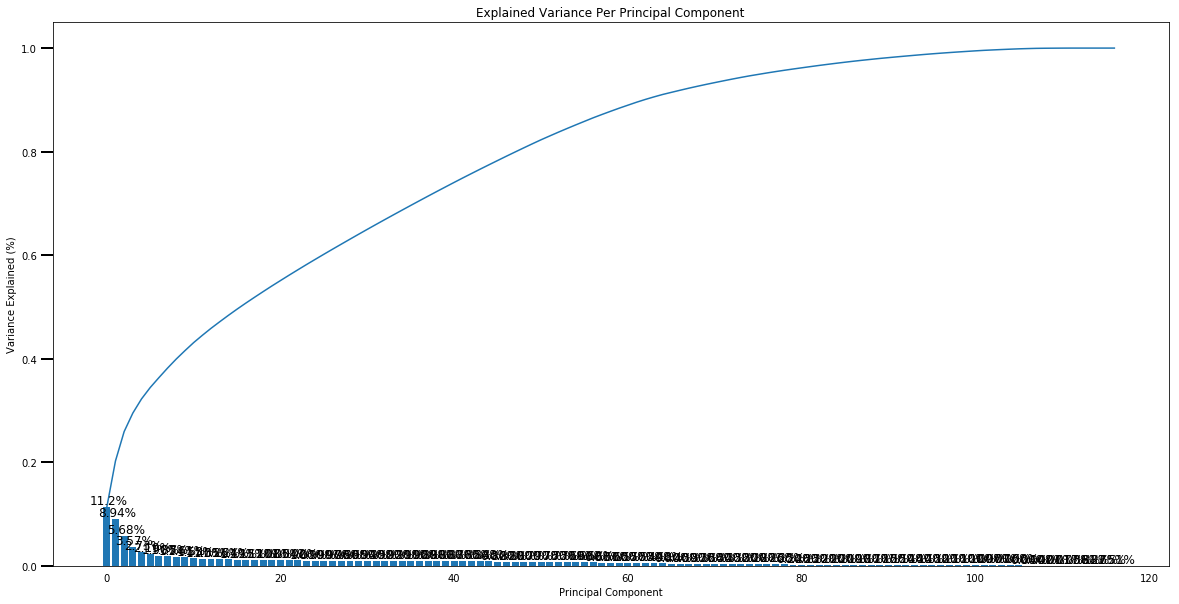

In [77]:
def scree_plot(pca):
    '''
    Function to create a scree plot for PCA 
    INPUT: 
     - pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
     - scree_plot
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(20, 10))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca)

This is a pretty busy and unreadable plot so I am going to try another plot

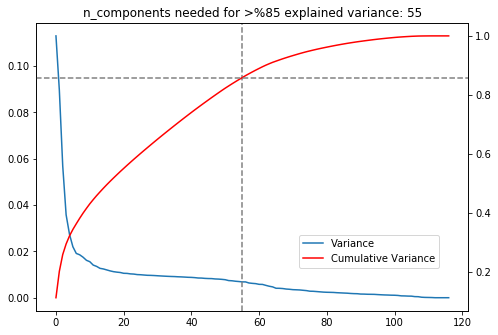

In [78]:
def pca_plot(pca):
    '''
    Function plots the number of component needed to get a 85% explained variance 
    INPUT:
     - PCA
    OUTPUT:
     - Plot
    '''

    n_components = min(np.where(np.cumsum(pca.explained_variance_ratio_)>0.85)[0]+1)

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1],True)
    ax2 = ax.twinx()
    ax.plot(pca.explained_variance_ratio_, label='Variance',)
    ax2.plot(np.cumsum(pca.explained_variance_ratio_), label='Cumulative Variance',color = 'red');
    ax.set_title('n_components needed for >%85 explained variance: {}'.format(n_components));
    ax.axvline(n_components, linestyle='dashed', color='grey')
    ax2.axhline(np.cumsum(pca.explained_variance_ratio_)[n_components], linestyle='dashed', color='gray')
    fig.legend(loc=(0.6,0.2));

pca_plot(pca)

In [79]:
start_time = time.time()

pca = PCA(n_components=55, random_state=10)
pca_pop = pca.fit_transform(azdias_1)

print("Total time: %s minutes" % np.round(((time.time() - start_time)/60),2))

Total time: 0.71 minutes


In [80]:
pca.explained_variance_ratio_.sum()


0.85141559982497794

### Discussion 2.2: Perform Dimensionality Reduction

When we plotted the PCA we found that we will need 55 components to achieve a 85% explained variace ratio. Knowing this will allow us to reduce the number of dimentions from 117 to 55! 

<a id='2.3'></a>
### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [81]:
def weights_pca(pca, i):
    '''
    Function to map the weight of the features in the pca
    INPUT:
     - PCA
     - i
    OUTPUT:
     - dictionary with weights
    '''
    
    weights_map = {}
    for counter, feature in enumerate(azdias_clean.columns):
        weights_map[feature] = pca.components_[i][counter]
    
    sorted_weights = sorted(weights_map.items(), key=operator.itemgetter(1), reverse=True)
    
    return sorted_weights



In [82]:
def plot_weights(df, pca, components):
    '''
    Plot features with the most variance 
    INPUT:
     - data frame
     - PCA
     - Components
    OUTPUT:
     - Plot 
    '''
    pca_comp = pd.DataFrame(np.round(pca.components_, 4), 
                              columns = df.keys()).iloc[components-1]
    pca_comp.sort_values(ascending=False, inplace=True)
    pca_comp = pd.concat([pca_comp.head(5), pca_comp.tail(5)])
    
    pca_comp.plot(kind='bar', title='Component ' + str(components))
    ax = plt.gca()
    ax.grid(linewidth='0.5', alpha=0.5)
    ax.set_axisbelow(True)
    plt.show()

In [83]:
weights_pca(pca,1)


[('ALTERSKATEGORIE_GROB', 0.22899390322995158),
 ('FINANZ_VORSORGER', 0.21418920657220167),
 ('ZABEOTYP_3.0', 0.20616767524448104),
 ('SEMIO_ERL', 0.1890821813221174),
 ('SEMIO_LUST', 0.1624815903767477),
 ('RETOURTYP_BK_S', 0.15492993395691404),
 ('W_KEIT_KIND_HH', 0.12703413615552742),
 ('FINANZ_HAUSBAUER', 0.11385869457638662),
 ('CJT_GESAMTTYP_2.0', 0.10758025652082132),
 ('FINANZTYP_5.0', 0.095227165652274945),
 ('PLZ8_ANTG3', 0.090120240106791691),
 ('SEMIO_KRIT', 0.086257959214243549),
 ('FINANZTYP_2.0', 0.085790691808474234),
 ('PLZ8_ANTG4', 0.085760245416408962),
 ('EWDICHTE', 0.083883666085950326),
 ('ORTSGR_KLS9', 0.083292924047261171),
 ('Wealth', 0.081836124910292615),
 ('SEMIO_KAEM', 0.078417309623265485),
 ('SHOPPER_TYP_3.0', 0.075252701465783098),
 ('CJT_GESAMTTYP_1.0', 0.06998337787533819),
 ('ARBEIT', 0.066795628258565873),
 ('FINANZTYP_6.0', 0.066595236105271627),
 ('KBA05_ANTG4', 0.066185652987235055),
 ('HH_EINKOMMEN_SCORE', 0.064410772885306916),
 ('ANZ_HAUSHALTE_

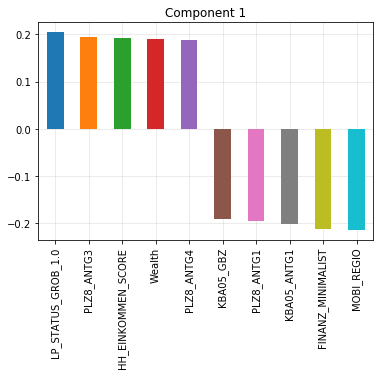

In [84]:
plot_weights(azdias_clean, pca, 1)


##### Component 1: 

The positive assiciations for component are in regards to social status, wealth, household net income, and regional factors. 

The negative assiciations seem to involve movement patters, financial minimalists, and how densly populated their are is (number of buildings in microcell and num family houses in microcell)

In [85]:
weights_pca(pca,2)

[('SEMIO_VERT', 0.32586293007287248),
 ('SEMIO_FAM', 0.25872246610789895),
 ('SEMIO_SOZ', 0.25823097822753621),
 ('SEMIO_KULT', 0.24789765516030654),
 ('FINANZTYP_5.0', 0.13725398664337168),
 ('FINANZ_MINIMALIST', 0.13217309117770426),
 ('SHOPPER_TYP_0.0', 0.12670524452031162),
 ('ZABEOTYP_1.0', 0.10728334220764592),
 ('SEMIO_REL', 0.10176354798974543),
 ('RETOURTYP_BK_S', 0.08718603849204809),
 ('W_KEIT_KIND_HH', 0.082312891909343211),
 ('SEMIO_MAT', 0.079987762717718972),
 ('FINANZ_VORSORGER', 0.066659130375034764),
 ('SHOPPER_TYP_1.0', 0.053358879400155698),
 ('ZABEOTYP_6.0', 0.052285041774057045),
 ('ORTSGR_KLS9', 0.051486981948320791),
 ('EWDICHTE', 0.050902954239234167),
 ('PLZ8_ANTG4', 0.048591447743803071),
 ('PLZ8_ANTG3', 0.048580468698214183),
 ('GREEN_AVANTGARDE', 0.04731319384461944),
 ('ARBEIT', 0.03687183133526982),
 ('PJ_Movement', 0.036493940660763578),
 ('ALTERSKATEGORIE_GROB', 0.036136495583291961),
 ('SEMIO_LUST', 0.036057462396318012),
 ('GFK_URLAUBERTYP_4.0', 0.033

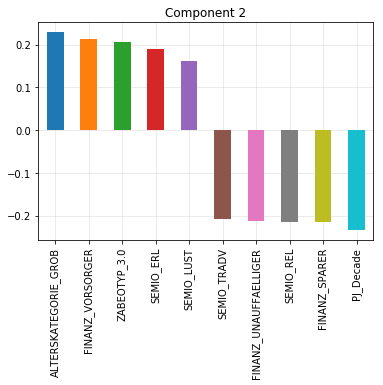

In [86]:
plot_weights(azdias_clean, pca, 2)

##### Component 2: 

The positive assiciations for the second component are in regards to estimated age, financial preparedness, energy consumption, and personalities for event oriented and sensual minded. 

The detractors are religious and traditional minded, inconspicuous spenders and money-savers, as well as their decade. 

In [87]:
weights_pca(pca,3)


[('GREEN_AVANTGARDE', 0.3353474470914421),
 ('PJ_Movement', 0.29924141006886712),
 ('LP_STATUS_GROB_5.0', 0.26235534796417442),
 ('EWDICHTE', 0.25069000825027293),
 ('ORTSGR_KLS9', 0.23638170066245912),
 ('FINANZTYP_5.0', 0.13119727918920371),
 ('ANZ_PERSONEN', 0.12395478850630669),
 ('ONLINE_AFFINITAET', 0.12381166789934894),
 ('CAMEO_DEUG_2015_1', 0.11884206294054871),
 ('OST_WEST_KZ_W', 0.11532585260378975),
 ('PLZ8_ANTG3', 0.11282569960444051),
 ('PLZ8_HHZ', 0.11240440235076392),
 ('SEMIO_DOM', 0.10979914444477035),
 ('PLZ8_ANTG2', 0.10832271906043207),
 ('ZABEOTYP_2.0', 0.10555073571659938),
 ('ZABEOTYP_1.0', 0.10347432359105606),
 ('RELAT_AB', 0.099348329034549765),
 ('PLZ8_ANTG4', 0.099035425173288935),
 ('LP_FAMILIE_GROB_5.0', 0.096859188420898606),
 ('SEMIO_KAEM', 0.092405536336853542),
 ('FINANZ_UNAUFFAELLIGER', 0.077606947469215135),
 ('CAMEO_DEUG_2015_2', 0.07195888100226723),
 ('SHOPPER_TYP_3.0', 0.065511766874313843),
 ('LP_STATUS_GROB_3.0', 0.061106290385259721),
 ('LP_F

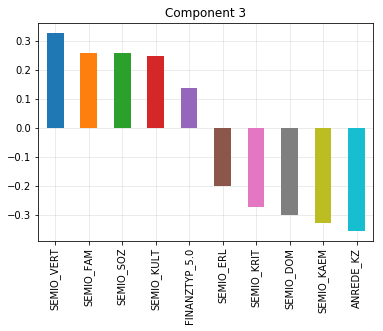

In [88]:
plot_weights(azdias_clean, pca, 3)

##### Component 3: 

The positive assiciations for the third component includes the following personality traits, dreamful, family minded, socially minded, and cultural minded. It also includes the most descriptive financial type for an individual.  

### Discussion 2.3: Interpret Principal Components

I have laid out each component with their positive and negative points. Overall it was very interesting to see how much influence personality types have. This should give interesting insights when building any marketing material. 

<a id='cluster'></a>
## Step 3: Clustering
<ul>
<li><a href="#3.1">Apply Clustering to General Population</a></li>
<li><a href="#3.2">Apply All Steps to the Customer Data</a></li>
<li><a href="#3.3">Compare Customer Data to Demographics Data</a></li>
</ul>

<a id='3.1'></a>
### Step 3.1: Apply Clustering to General Population

Below we will use KMeans algoriths to identify different customer segments from the demographics ata. 

We will first need to identify the amount of clusters we want to include in our KMeans. 

In [89]:
scores = []
clusters = np.arange(1, 31)

start_time = time.time()

for c in clusters:
    
    model = KMeans(c)
    model.fit(pca_1)
    
    scores.append(abs(model.score(pca_1)))

    print(f'Running Score for {c} Clusters: {abs(model.score(pca_1)):.3f}')

    
print("Run time: %s minutes" % np.round(((time.time() - start_time)/60),2))    
    

Running Score for 1 Clusters: 93373839.000
Running Score for 2 Clusters: 85381437.650
Running Score for 3 Clusters: 81204638.234
Running Score for 4 Clusters: 78514624.420
Running Score for 5 Clusters: 76924562.111
Running Score for 6 Clusters: 75457069.406
Running Score for 7 Clusters: 74121692.102
Running Score for 8 Clusters: 73032863.317
Running Score for 9 Clusters: 72261344.333
Running Score for 10 Clusters: 71565979.558
Running Score for 11 Clusters: 70920855.794
Running Score for 12 Clusters: 70274478.744
Running Score for 13 Clusters: 69993703.305
Running Score for 14 Clusters: 69256190.770
Running Score for 15 Clusters: 68772645.626
Running Score for 16 Clusters: 68704851.208
Running Score for 17 Clusters: 68172784.010
Running Score for 18 Clusters: 68114003.214
Running Score for 19 Clusters: 67339998.511
Running Score for 20 Clusters: 67044549.173
Running Score for 21 Clusters: 66491771.508
Running Score for 22 Clusters: 66438670.975
Running Score for 23 Clusters: 66225228.9

In [90]:
scores

[93373839.000085041,
 85381437.650181875,
 81204638.23441954,
 78514624.419961885,
 76924562.110687658,
 75457069.405570209,
 74121692.101619437,
 73032863.317457512,
 72261344.332805291,
 71565979.558084697,
 70920855.794098422,
 70274478.744271338,
 69993703.305392697,
 69256190.769683063,
 68772645.625570774,
 68704851.208342567,
 68172784.010141388,
 68114003.213543549,
 67339998.511213094,
 67044549.172533907,
 66491771.507639989,
 66438670.975220352,
 66225228.928975873,
 65904759.852443375,
 65565902.327082671,
 65353970.515139177,
 65091359.043005452,
 64871024.107016504,
 64576161.738394529,
 64498504.074426509]

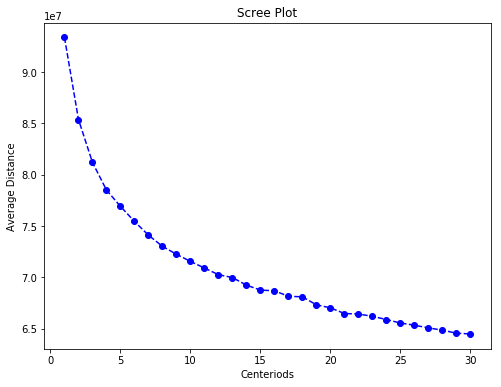

In [93]:
plt.figure(figsize=(8, 6))
plt.plot(clusters, scores, linestyle='--', marker='o', color='b');
plt.xlabel('Centeriods');
plt.ylabel('Average Distance');
plt.title('Scree Plot');

### Discussion 3.1: Apply Clustering to General Population

Based on the scree plot above it looks like the elbow is a k=15. 

In [94]:
# Fit and predict the KMeans model for the general population

start_time = time.time()

pop_mod = KMeans(15)
pop_mod.fit(pca_pop)

print("Run time: %s minutes" % np.round(((time.time() - start_time)/60),2))    



Run time: 6.52 minutes


In [95]:
pop_predict = pop_mod.predict(pca_pop)

<a id='3.2'></a>
### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [288]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

In [289]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customers_clean = clean_data(customers)


In [290]:
customers_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PJ_Decade,PJ_Movement,Wealth,Life_Stage
0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1,1.0,...,0,0,0,0,0,0,1.0,1,1.0,3.0
2,4.0,2.0,5.0,1.0,5.0,1.0,4.0,4.0,1,2.0,...,0,1,0,0,0,0,1.0,1,3.0,4.0
3,4.0,1.0,5.0,1.0,5.0,2.0,1.0,2.0,0,2.0,...,1,0,0,0,0,0,0.0,0,2.0,4.0
4,3.0,1.0,3.0,1.0,4.0,4.0,5.0,2.0,0,3.0,...,0,0,0,1,0,0,3.0,0,4.0,1.0
5,3.0,1.0,5.0,1.0,5.0,1.0,2.0,3.0,1,3.0,...,0,1,0,0,0,0,1.0,1,3.0,4.0


In [291]:
customers_clean.tail()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PJ_Decade,PJ_Movement,Wealth,Life_Stage
191647,3.0,1.0,5.0,1.0,5.0,1.0,1.0,2.0,1,3.0,...,0,0,0,0,0,0,1.0,1,1.0,4.0
191648,4.0,2.0,5.0,1.0,5.0,2.0,2.0,3.0,0,2.0,...,0,1,0,0,0,0,2.0,0,3.0,2.0
191649,4.0,1.0,5.0,1.0,5.0,1.0,1.0,2.0,1,2.0,...,1,0,0,0,0,0,1.0,1,2.0,4.0
191650,3.0,2.0,2.0,1.0,5.0,1.0,2.0,5.0,0,2.0,...,1,0,0,0,0,0,3.0,0,2.0,4.0
191651,2.0,1.0,5.0,1.0,5.0,1.0,1.0,2.0,0,2.0,...,0,1,0,0,0,0,1.0,0,3.0,3.0


In [292]:
# Fill any missing with the mean

customers_clean_imputed = pd.DataFrame(mean_imp.transform(customers_clean))
customers_clean_imputed.columns = customers_clean.columns
customers_clean_imputed.index = customers_clean.index

In [293]:
# Scale Data and turn it into a dataframe

customers_clean_scaled = scaler.transform(customers_clean_imputed)
customers_clean_scaled = pd.DataFrame(customers_clean_scaled, columns=list(customers_clean_imputed))

In [294]:
# PCA transformation

customers_pca = pca.transform(customers_clean_scaled)


In [295]:
customers_clean_imputed.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PJ_Decade,PJ_Movement,Wealth,Life_Stage
0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0
2,4.0,2.0,5.0,1.0,5.0,1.0,4.0,4.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,4.0
3,4.0,1.0,5.0,1.0,5.0,2.0,1.0,2.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
4,3.0,1.0,3.0,1.0,4.0,4.0,5.0,2.0,0.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,4.0,1.0
5,3.0,1.0,5.0,1.0,5.0,1.0,2.0,3.0,1.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,4.0


In [296]:
# Instansiate model with k=15.

cust_mod = KMeans(15)
cust_mod.fit(customers_pca)
cust_predict = cust_mod.predict(customers_pca)

<a id='3.3'></a>
### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

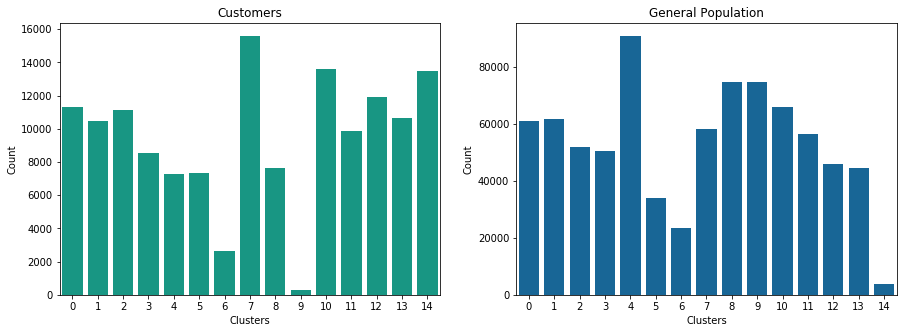

In [297]:
# Compare the data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

figure, axs = plt.subplots(nrows=1, ncols=2, figsize= (15, 5))
figure.subplots_adjust(hspace = 1, wspace=.2)

sns.countplot(cust_predict, ax=axs[0], palette=['#03AB92'])
sns.countplot(pop_predict, ax=axs[1], palette=['#036BAB'])

axs[0].set_title('Customers')
axs[0].set_xlabel('Clusters')
axs[0].set_ylabel('Count')
axs[1].set_title('General Population')
axs[1].set_xlabel('Clusters')
axs[1].set_ylabel('Count');



The plot above tells us there there are quite a few differences between the customers clusters and general population clusters. Cluster 7 in the customers data is overrepresented while the the general population has 4 as overrepresented. The underrepresented clusters also differ, number 9 for customers and 14 for the general population

In [311]:
def plot_scaled_comparison(df, model, cluster):
    '''
    Function to show most negative and positive correlated features. This will help interpret the clusters
    INPUTS:
     - DataFrame
     - KMeans Model
     - Cluster
    OUTPUT:
     - Plot with scaled feature weights. 
    '''
    X = pd.DataFrame.from_dict(dict(zip(df.columns,
        pca.inverse_transform(model.cluster_centers_[cluster]))), orient='index').rename(
        columns={0: 'feature_values'}).sort_values('feature_values', ascending=False)
    X['feature_values_abs'] = abs(X['feature_values'])
    pd.concat((X['feature_values'][:10], X['feature_values'][-5:]), axis=0).plot(kind='barh');

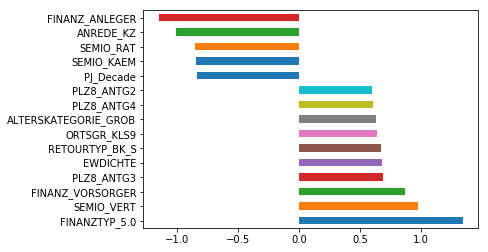

In [312]:
plot_scaled_comparison(customers_clean, cust_mod, 7)

This plot is interesting. It tells us that the most positive and negative correlation is investors. I don't know how  FINANZTYP_5.0 and FINAZ_ANGLER differ, but according to the data dictionary they are both investors. 

It is also interesting to see that the positive features in the clusers revolve around a regional community. PLZ8_ANTG2, PLZ8_ANTG3, PLZ8_ANTG4, represents family houses that are 3+. EWDICHTE is the density of households per kilometer and ORTSGR_KLS is the size of the community. 

We can also see that this cluster could potentially indicate a loyal customer base (RETOURTYP_BK_S), with a finacial preparedness (FINANZ_VORSORGER). 

The detractors make me think they are an older cantankerous bunch. Age, combative attitude and rational are features of this group.  

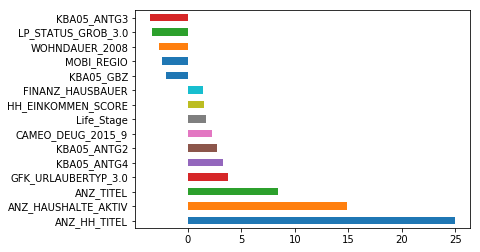

In [313]:
plot_scaled_comparison(customers_clean, cust_mod, 9)

We can see that life stage (CAMEO_DEUG_2015 & Life_Stage), income level (HH_EINKOMMEN_SCORE), and education(ANZ_HH_TITEL, ANZ_TITEL) play a big role in this underrepresented cluster. 

We can see that this group consists of homeowners, but most of the columns relate to buildings, so the homes could potentially be condos. 

The family type, length of residence and movement patterns seem to be detractors in this group. It is also interesting to see that while family houses with 3-5 and 10+ within a microcell are positive, the middle group (6-10) is negative.


In [307]:
clust_7 = scaler.inverse_transform(pca.inverse_transform(customers_pca[np.where(cust_predict==7)]))

In [308]:
df_overrep = pd.DataFrame(data=clust_7,
          index=np.array(range(0, clust_7.shape[0])),
          columns=customers_clean.columns)
df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PJ_Decade,PJ_Movement,Wealth,Life_Stage
0,4.092319,1.022016,2.454889,0.648520,4.932932,-0.441420,0.707241,5.339783,0.304705,1.329814,...,0.003329,0.155729,-0.225140,0.042345,-0.257723,0.984887,1.349440,0.311852,3.907251,6.484371
1,1.809421,0.879852,1.727802,2.788060,4.096323,1.885838,0.764728,4.471518,0.023817,2.051397,...,-0.037091,-0.110362,-0.331021,-0.049554,-0.060492,1.575174,3.323171,0.177427,5.756098,3.478134
2,4.120068,1.830935,2.467597,0.804965,5.134789,0.393724,1.125913,5.222009,0.664184,1.681489,...,0.025556,-0.009890,-0.000688,-0.108009,-0.097126,1.038392,1.141238,0.792522,4.599683,3.991911
3,4.103790,1.873944,1.492687,1.140753,4.358064,0.306270,0.592440,5.564004,0.174589,2.214434,...,-0.016896,0.258723,-0.422599,0.096069,-0.281538,1.130165,1.966329,0.300915,4.171270,7.825166
4,4.051561,0.962940,2.661910,1.082883,4.951170,0.020882,1.327090,5.096382,0.715353,1.285963,...,0.066203,0.177502,-0.020211,0.052521,-0.140129,0.755418,1.608796,0.809366,4.169455,5.361153


In [309]:
clust_9= scaler.inverse_transform(pca.inverse_transform(customers_pca[np.where(cust_predict==7)]))


In [310]:
df_underrep = pd.DataFrame(data=clust_9,
          index=np.array(range(0, clust_9.shape[0])),
          columns=customers_clean.columns)
df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PJ_Decade,PJ_Movement,Wealth,Life_Stage
0,4.092319,1.022016,2.454889,0.648520,4.932932,-0.441420,0.707241,5.339783,0.304705,1.329814,...,0.003329,0.155729,-0.225140,0.042345,-0.257723,0.984887,1.349440,0.311852,3.907251,6.484371
1,1.809421,0.879852,1.727802,2.788060,4.096323,1.885838,0.764728,4.471518,0.023817,2.051397,...,-0.037091,-0.110362,-0.331021,-0.049554,-0.060492,1.575174,3.323171,0.177427,5.756098,3.478134
2,4.120068,1.830935,2.467597,0.804965,5.134789,0.393724,1.125913,5.222009,0.664184,1.681489,...,0.025556,-0.009890,-0.000688,-0.108009,-0.097126,1.038392,1.141238,0.792522,4.599683,3.991911
3,4.103790,1.873944,1.492687,1.140753,4.358064,0.306270,0.592440,5.564004,0.174589,2.214434,...,-0.016896,0.258723,-0.422599,0.096069,-0.281538,1.130165,1.966329,0.300915,4.171270,7.825166
4,4.051561,0.962940,2.661910,1.082883,4.951170,0.020882,1.327090,5.096382,0.715353,1.285963,...,0.066203,0.177502,-0.020211,0.052521,-0.140129,0.755418,1.608796,0.809366,4.169455,5.361153


### Discussion 3.3: Compare Customer Data to Demographics Data

Before any conclusions are drawn I think that it is important to recognize that I dropped a lot of rows with missing data as well as outliers without more investigation. Having this data could drastically change the results of the analysis. 

With that caveat. Based on the two clusters I reviewed I get the impression that they could represent rural vs urban lifestyles. There is definitely more analysis that is needed before that is confirmed. However, based on what the data we saw in the the over represented group (potentially a rural group) we saw that this was regional with large familes in 1 hoursehold (3+ individuals). We could also see that community was important to this group, and could assume that they are loyal customers. 

The underrepresented group (possibly city dwellers). They are educated, go on vacations, live in apartment buildings (either large or small), they also have a good income. 

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.